# Classification(Lesson 1)
## Decision Trees

### First of all import needed packages

In [4]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Use this to show matplotlib and plots properly(But not essential)
%matplotlib inline

### Read the csv(Comma seperated value) file with pandas

In [5]:
Data_Frame = pd.read_csv('Drugs.csv')
# Read first 5 lines or its shape
Data_Frame[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [6]:
Data_Frame.size
# Number of all lines

1200

In [96]:
Data_Frame.shape
# (rows,columns)

(200, 6)

### Preproccessing our data

In [7]:
x = Data_Frame[['Age','Sex','BP','Cholesterol','Na_to_K']].values
x[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [8]:
y = Data_Frame['Drug']
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [100]:
from sklearn import preprocessing
# This makes labels from 1 to (our_classes)-1
label_sex = preprocessing.LabelEncoder()
label_sex.fit(['F','M'])
# column 1 from x
x[:,1] = label_sex.transform(x[:,1])

label_bp = preprocessing.LabelEncoder()
label_bp.fit(['LOW','NORMAL','HIGH'])
# column 2 from x
x[:,2] = label_bp.transform(x[:,2])

label_cholesterol = preprocessing.LabelEncoder()
label_cholesterol.fit(['NORMAL','HIGH'])
# column 3 from x
x[:,3] = label_cholesterol.transform(x[:,3])

In [101]:
x[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

### Split your data into test and train

In [64]:
from sklearn.model_selection import train_test_split
# 30 % for test and 70 % for train
x_train , x_test , y_train , y_test = train_test_split(x,y,
                                                      test_size=0.3,
                                                      random_state=3)
print(f'Train_x : {x_train.shape}\nTrain_y : {y_train.shape}')
print('\n')
print(f'Test_x : {x_test.shape}\nTest_y : {y_test.shape}')

Train_x : (140, 5)
Train_y : (140,)


Test_x : (60, 5)
Test_y : (60,)


### Create and run your model

In [65]:
Druge_Model = DecisionTreeClassifier(criterion='entropy',max_depth=4)
Druge_Model
# criterion can be 'entropy' or 'gini' which is gini by default

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [66]:
Druge_Model.fit(x_train,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [67]:
predicted_y = Druge_Model.predict(x_test)
print(predicted_y[0:5])
print('-------------------')
print(y_test[0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
-------------------
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


### Evaluate the accuracy of the model

In [68]:
from sklearn.metrics import accuracy_score
print('Decision tree accuracy is',accuracy_score(y_test,predicted_y)*100,'%')

Decision tree accuracy is 98.33333333333333 %


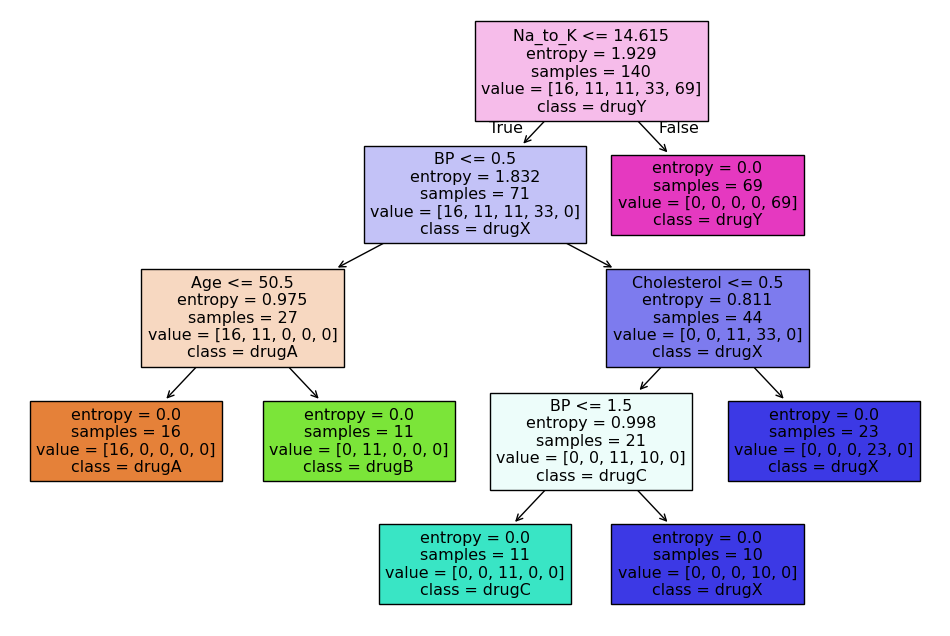

In [93]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(Druge_Model,filled=True,feature_names=Data_Frame.columns[0:5],class_names=np.unique(y_train))
plt.show()